In [285]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.getcwd() + '/ML')

In [286]:
df= pd.read_csv(r"./timezone-PA.csv", sep=',')
df = df.drop_duplicates(subset=['iid'])
dfg= pd.read_csv(r"./PA-AgeGender-Predicted.csv", sep=',')
dfg = dfg.drop_duplicates(subset=['user.id'])
df['user.id']=df['user.id'].astype("category")
main= pd.read_csv(r"./PA2.csv", sep=',')
main = main.drop_duplicates('iid', keep='first')
#main['user.id']=main['user.id'].astype('str')

Columns (398,497,498,503,504,506,509,512,515,517,518,519,520,525,526,528,531,534,537,539,540,541,542,547,548,550,553,556,559,561,562,592,593,598,599,601,604,607,610,612,613,614,615,620,621,623,626,629,632,634,635,636,637,642,643,645,648,651,654,656,657,662,672,681,682,683,684,685,686,687,688,711,762) have mixed types.Specify dtype option on import or set low_memory=False.


In [288]:
R1= df[['iid', 'A1', 'A2', 'A3', 'truth', 'text', 'hour', 'weekday', 'month']]
R2= main[['iid', 'user.id']]

In [289]:
M=pd.merge(R2, R1, on='iid', how='inner')

In [290]:
print(M.shape)
M.head()

(3686, 10)


,iid,user.id,A1,A2,A3,truth,text,hour,weekday,month
0,5cf83b7444578a0664cf472c,762180289611173900,0,1,1,1,Ughhhh I have to drive to the @FlyEIA to pick ...,19,Sat,12
1,5cf83b8e44578a0664d35d68,41926809,1,0,1,1,A lovely hike up Mt. McIntyre today...December...,19,Sat,12
2,5cf83ba344578a0664d67efb,22136101,0,0,0,0,After yesterday’s massive snowstorm and Bully ...,21,Fri,12
3,5cf83bad44578a0664d8239a,2800639055,0,0,1,0,Me when my lil cousins try to wrestle me on Tu...,22,Sat,12
4,5cf83bf844578a0664e435d7,2809812847,0,0,0,0,"So extremely sad, hurt, angry and disgusted by...",00,Sun,12


In [291]:
del dfg['iid']
M2=pd.merge(M, dfg, on='user.id', how='inner')

In [292]:
M2.head()

,iid,user.id,A1,A2,A3,truth,text,hour,weekday,month,...,30-39,<=18,>=40,female,male,is-org,non-org,age,sex,org
0,5cf83b8e44578a0664d35d68,41926809,1,0,1,1,A lovely hike up Mt. McIntyre today...December...,19,Sat,12,...,0.1116,0.0015,0.8764,0.9980,0.0020,0.0001,0.9999,>=40,female,non-org
1,5d0a15b644578a00e0c490cb,41926809,1,0,0,1,A lovely hike at the Research Forest Near Whit...,17,Sat,03,...,0.1116,0.0015,0.8764,0.9980,0.0020,0.0001,0.9999,>=40,female,non-org
2,5d0ebe3144578a14801c7afd,41926809,1,0,1,1,A Lovely day for a hike in the Yukon! The leav...,19,Sat,05,...,0.1116,0.0015,0.8764,0.9980,0.0020,0.0001,0.9999,>=40,female,non-org
3,5cf83ba344578a0664d67efb,22136101,0,0,0,0,After yesterday’s massive snowstorm and Bully ...,21,Fri,12,...,0.0096,0.0153,0.9690,0.0107,0.9893,0.7337,0.2663,>=40,male,is-org
4,5cf83bad44578a0664d8239a,2800639055,0,0,1,0,Me when my lil cousins try to wrestle me on Tu...,22,Sat,12,...,0.0390,0.5278,0.0320,0.9734,0.0266,0.0002,0.9998,<=18,female,non-org


In [293]:
M2.shape

(3111, 26)

In [294]:
df_hindex= pd.read_csv("PA_hardIndex.csv")
df_hindex.columns

Index(['question', 'RMV', 'REM', 'RGLAD', 'RLFC', 'truth', 'AND', 'OR',
       'hard'],
      dtype='object')

In [295]:
df_hindex.columns=['iid', 'RMV', 'REM', 'RGLAD', 'RLFC', 'truthindex', 'AND', 'OR',
       'hard']

In [296]:
M_hindex=pd.merge(M2, df_hindex, on='iid', how='inner')

In [298]:
# M2=M2[['iid','A1', 'A2', 'A3', 'age', 'sex', 'org','hour','weekday','text', 'month']]
M_hindex=M_hindex[[ 'A1', 'A2', 'A3', 'hour', 'weekday', 'truth',
       'month', 'age', 'sex', 'org', 'RMV', 'REM', 'RGLAD', 'RLFC']]

In [299]:
M_hindex.head()

,A1,A2,A3,hour,weekday,truth,month,age,sex,org,RMV,REM,RGLAD,RLFC
0,1,0,1,19,Sat,1,12,>=40,female,non-org,1,1,1,1
1,1,0,0,17,Sat,1,03,>=40,female,non-org,0,0,0,0
2,1,0,1,19,Sat,1,05,>=40,female,non-org,1,1,1,1
3,0,0,0,21,Fri,0,12,>=40,male,is-org,0,0,0,0
4,0,0,1,22,Sat,0,12,<=18,female,non-org,0,0,0,0


In [301]:
df=M_hindex

In [302]:
df_easy= pd.read_csv("df_easy.csv")

------------------------------------

### I need to generate a separate CSV file to be able to test the number of FN's between inference methods and ML models.

In [305]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
from plotly.graph_objs import *

# for configuring connection 
import os

%matplotlib inline


import os


from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

#configure the notebook for use in offline mode
init_notebook_mode(connected=True)

In [306]:

missing_values_count = df.isnull().sum()
missing_values_count

A1         0
A2         0
A3         0
hour       0
weekday    0
truth      0
month      0
age        0
sex        0
org        0
RMV        0
REM        0
RGLAD      0
RLFC       0
dtype: int64

In [307]:
df= df[df['hour']!='dummy']
df['weekday']=df['weekday'].astype("category")
df['hour']=df['hour'].astype("int")
df['month']=df['month'].astype("int")
df['A1']=df['A1'].astype("category")
df['A2']=df['A2'].astype("category")
df['A3']=df['A3'].astype("category")
df['sex']=df['sex'].astype("category")
df['age']=df['age'].astype("category")
df['org']=df['org'].astype("category")
df['truth']=df['truth'].astype("category")
#df['result']=df['result'].astype("category")

df.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,A1,A2,A3,hour,weekday,truth,month,age,sex,org,RMV,REM,RGLAD,RLFC
0,1,0,1,19,Sat,1,12,>=40,female,non-org,1,1,1,1
1,1,0,0,17,Sat,1,3,>=40,female,non-org,0,0,0,0
2,1,0,1,19,Sat,1,5,>=40,female,non-org,1,1,1,1
3,0,0,0,21,Fri,0,12,>=40,male,is-org,0,0,0,0
4,0,0,1,22,Sat,0,12,<=18,female,non-org,0,0,0,0


In [308]:
df.columns

Index(['A1', 'A2', 'A3', 'hour', 'weekday', 'truth', 'month', 'age', 'sex',
       'org', 'RMV', 'REM', 'RGLAD', 'RLFC'],
      dtype='object')

In [309]:
df['truth'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [310]:
# df['truth']=np.where(df['truth'] ==1, 'YY', df['truth'])
# df['truth']=np.where(df['truth'] =='2', 'YN', df['truth'])
# df['truth']=np.where(df['truth'] =='3', 'NY', df['truth'])
# df['truth']=np.where(df['truth'] =='4', 'NN', df['truth'])
# #df['truth']=np.where(df['truth'] =='5', 'NC', df['truth'])

In [311]:
df = pd.get_dummies(df, prefix=['weekday', 'month', 'age', 'sex', 'org'], columns=['weekday', 'month', 'age', 'sex', 'org'], drop_first=False)

df.head()


,A1,A2,A3,hour,truth,RMV,REM,RGLAD,RLFC,weekday_Fri,...,month_11,month_12,age_19-29,age_30-39,age_<=18,age_>=40,sex_female,sex_male,org_is-org,org_non-org
0,1,0,1,19,1,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,1
1,1,0,0,17,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,1,0,1,19,1,1,1,1,1,0,...,0,0,0,0,0,1,1,0,0,1
3,0,0,0,21,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0,0,1,22,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [312]:
df.truth.value_counts()

0    1839
1    1260
Name: truth, dtype: int64

In [313]:
df.columns

Index(['A1', 'A2', 'A3', 'hour', 'truth', 'RMV', 'REM', 'RGLAD', 'RLFC',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'age_19-29', 'age_30-39',
       'age_<=18', 'age_>=40', 'sex_female', 'sex_male', 'org_is-org',
       'org_non-org'],
      dtype='object')

In [314]:
df['A1']=df['A1'].astype("bool")
df['A2']=df['A2'].astype("bool")
df['A3']=df['A3'].astype("bool")
df['RMV']=df['RMV'].astype("bool")
df['RGLAD']=df['RGLAD'].astype("bool")
df['RLFC']=df['RLFC'].astype("bool")
df['REM']=df['REM'].astype("bool")
df['weekday_Sun']=df['weekday_Sun'].astype("bool")

In [315]:
df.columns

Index(['A1', 'A2', 'A3', 'hour', 'truth', 'RMV', 'REM', 'RGLAD', 'RLFC',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'age_19-29', 'age_30-39',
       'age_<=18', 'age_>=40', 'sex_female', 'sex_male', 'org_is-org',
       'org_non-org'],
      dtype='object')

In [316]:
df.columns=['Label#1', 'Label#2', 'Label#3', 'DayTime (hour)', 'truth', 'Majority Voting', 'D&S', 'GLAD', 'LFC',
       'Weekday (Fri)', 'Weekday (Mon)', 'Weekday (Sat)', 'Weekday (Sun)',
       'Weekday (Thu)', 'Weekday (Tue)', 'Weekday (Wed)', 'January', 'February',
       'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Age:19-29', 'Age:30-39',
       'Age: 18 or less', 'age: 40 or more', 'Female', 'Male', 'Orgzanization',
       'Actual User']

In [317]:
import re
regex = re.compile(r"\[|\]|<|>", re.IGNORECASE)
df=df[['Label#1', 'Label#2', 'Label#3', 'DayTime (hour)', 'truth', 'Majority Voting', 'D&S', 'GLAD', 'LFC',
       'Weekday (Tue)', 'Weekday (Wed)', 'January', 'February',
       'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Age:19-29', 'Age:30-39',
       'Age: 18 or less', 'age: 40 or more', 'Female', 'Male', 'Orgzanization',
       'Actual User']]


 
    
# df=df[['A1', 'A2', 'A3', 'hour', 'truth', 'RMV', 'RLFC',
#        'weekday_Mon', 'age_19-29', 'age_>=40', 'sex_female']]    
    
#df=df[['hour', 'month', 'truth', 'A1_1', 'A2_1', 'A3_1']]    
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in df.columns.values]


In [318]:
df.columns

Index(['Label#1', 'Label#2', 'Label#3', 'DayTime (hour)', 'truth',
       'Majority Voting', 'D&S', 'GLAD', 'LFC', 'Weekday (Tue)',
       'Weekday (Wed)', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Age:19-29', 'Age:30-39', 'Age: 18 or less', 'age: 40 or more',
       'Female', 'Male', 'Orgzanization', 'Actual User'],
      dtype='object')

In [321]:

X=df.drop('truth', 1)
y=df['truth']
df_cols = list(X)

In [323]:
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))

['truth']

----------------------------

## Logistic Regression

In [324]:
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from imblearn.metrics import classification_report_imbalanced
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from numpy import argmax
import matplotlib.pyplot as plt
import itertools
from matplotlib import pyplot

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


0.4393414829340252


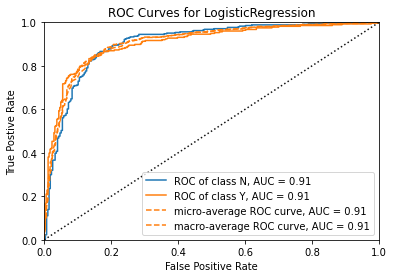

Accuracy: 0.8483870967741935
f-score: 0.8516129032258064
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.87      0.83      0.87      0.85      0.72       344
          1       0.83      0.83      0.87      0.83      0.85      0.72       276

avg / total       0.85      0.85      0.85      0.85      0.85      0.72       620



In [325]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
# classes=['YY','YN','NY','NN', 'NC']
classes=['N', 'Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


model = linear_model.LogisticRegression(C=2,max_iter= 66,tol= 6.75e-05, class_weight='balanced') 
model.fit(X_train, y_train)  



y_proba = model.predict_proba(X_test)

y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))

# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)

threshold = thresholds[ix]
print(threshold)
y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_proba.max(axis=1)
predictions['y_pred']= y_pred

In [326]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='micro', beta=1.2)

0.8516129032258064

Best Threshold=0.034330,recall=1.000
Best Threshold=0.404310, F-Score=0.836


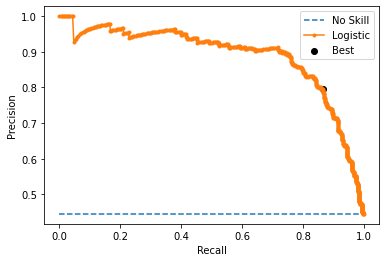

In [327]:

#------------------Only the positive class----------
y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1.2
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)
print('Best Threshold=%f,recall=%.3f' % (thresholds[iy], recall[iy]))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [328]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
auc_score

0.8704301075268818

In [332]:
lr_auc = roc_auc_score(y_test, y_pred)
lr_auc

0.8498062015503877

In [333]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='macro', beta=1.2)

0.8498062015503876

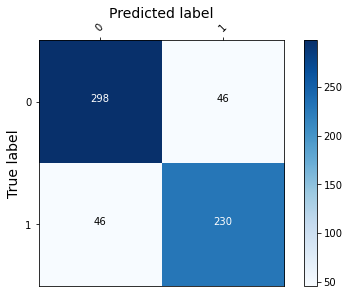

In [334]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

## Active Learning

In [267]:
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
from sklearn import svm

X_raw = df.drop('truth', 1).values
y_raw = df['truth'].values
type(X_raw)

#Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=5)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]


# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

In [268]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = linear_model.LogisticRegression(C= 3,max_iter= 66,tol= 6.75e-05, class_weight='balanced') 
rf = RandomForestClassifier(n_estimators=100, max_depth= 30, max_features=.75, criterion='entropy', min_samples_split=15, class_weight='balanced')
xgb = XGBClassifier(max_depth=18, gamma=0.03, colsample_bytree=0.71, class_weight='balanced') 
svm = svm.SVC(kernel='linear', C=3, probability=True) 
learner = ActiveLearner(estimator=lr, X_training=X_train, y_training=y_train)
unqueried_score = learner.score(X_raw, y_raw)


In [269]:
N_QUERIES = 100
performance_history_lr = [unqueried_score]
performance_history_knn = [unqueried_score]
performance_history_rf = [unqueried_score]
performance_history_xgb = [unqueried_score]
performance_history_svm = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
learner = ActiveLearner(estimator=lr, X_training=X_train, y_training=y_train)
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history_lr.append(model_accuracy)

    
learner = ActiveLearner(estimator=knn, X_training=X_train, y_training=y_train)
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history_knn.append(model_accuracy)
    

learner = ActiveLearner(estimator=rf, X_training=X_train, y_training=y_train)
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history_rf.append(model_accuracy)
    
    
learner = ActiveLearner(estimator=xgb, X_training=X_train, y_training=y_train)
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history_xgb.append(model_accuracy)

    
    
learner = ActiveLearner(estimator=svm, X_training=X_train, y_training=y_train)
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history_svm.append(model_accuracy)

Accuracy after query 1: 0.6173
Accuracy after query 2: 0.6847
Accuracy after query 3: 0.6615
Accuracy after query 4: 0.6544
Accuracy after query 5: 0.6715
Accuracy after query 6: 0.7054
Accuracy after query 7: 0.7293
Accuracy after query 8: 0.7325


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 9: 0.7328
Accuracy after query 10: 0.7325
Accuracy after query 11: 0.7325
Accuracy after query 12: 0.7277
Accuracy after query 13: 0.7309
Accuracy after query 14: 0.7302
Accuracy after query 15: 0.7328
Accuracy after query 16: 0.7341
Accuracy after query 17: 0.7235
Accuracy after query 18: 0.7299
Accuracy after query 19: 0.7341


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 20: 0.7402
Accuracy after query 21: 0.7496
Accuracy after query 22: 0.7490
Accuracy after query 23: 0.7502
Accuracy after query 24: 0.7470
Accuracy after query 25: 0.7599
Accuracy after query 26: 0.7825
Accuracy after query 27: 0.7854


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 28: 0.7935
Accuracy after query 29: 0.7867
Accuracy after query 30: 0.7799
Accuracy after query 31: 0.7903
Accuracy after query 32: 0.7977
Accuracy after query 33: 0.8035
Accuracy after query 34: 0.8122
Accuracy after query 35: 0.8148
Accuracy after query 36: 0.8157
Accuracy after query 37: 0.8161
Accuracy after query 38: 0.8174
Accuracy after query 39: 0.8148
Accuracy after query 40: 0.8170
Accuracy after query 41: 0.8187
Accuracy after query 42: 0.8216
Accuracy after query 43: 0.8241
Accuracy after query 44: 0.8251
Accuracy after query 45: 0.8303


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 46: 0.8322
Accuracy after query 47: 0.8328
Accuracy after query 48: 0.8309
Accuracy after query 49: 0.8345
Accuracy after query 50: 0.8303
Accuracy after query 51: 0.8267
Accuracy after query 52: 0.8238
Accuracy after query 53: 0.8261
Accuracy after query 54: 0.8280


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 55: 0.8274
Accuracy after query 56: 0.8309
Accuracy after query 57: 0.8309
Accuracy after query 58: 0.8325
Accuracy after query 59: 0.8319
Accuracy after query 60: 0.8309
Accuracy after query 61: 0.8306
Accuracy after query 62: 0.8303
Accuracy after query 63: 0.8306
Accuracy after query 64: 0.8322
Accuracy after query 65: 0.8296


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 66: 0.8306
Accuracy after query 67: 0.8325
Accuracy after query 68: 0.8338
Accuracy after query 69: 0.8319
Accuracy after query 70: 0.8296
Accuracy after query 71: 0.8306
Accuracy after query 72: 0.8306
Accuracy after query 73: 0.8309
Accuracy after query 74: 0.8316


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 75: 0.8345
Accuracy after query 76: 0.8351
Accuracy after query 77: 0.8338
Accuracy after query 78: 0.8377
Accuracy after query 79: 0.8367
Accuracy after query 80: 0.8367
Accuracy after query 81: 0.8374
Accuracy after query 82: 0.8383
Accuracy after query 83: 0.8393
Accuracy after query 84: 0.8390


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 85: 0.8399
Accuracy after query 86: 0.8399
Accuracy after query 87: 0.8399
Accuracy after query 88: 0.8380
Accuracy after query 89: 0.8364
Accuracy after query 90: 0.8393
Accuracy after query 91: 0.8393
Accuracy after query 92: 0.8383


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 93: 0.8387
Accuracy after query 94: 0.8390
Accuracy after query 95: 0.8383
Accuracy after query 96: 0.8396
Accuracy after query 97: 0.8393
Accuracy after query 98: 0.8390
Accuracy after query 99: 0.8399


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy after query 100: 0.8406
Accuracy after query 1: 0.4753
Accuracy after query 2: 0.4066
Accuracy after query 3: 0.4066
Accuracy after query 4: 0.4579
Accuracy after query 5: 0.5082
Accuracy after query 6: 0.5392
Accuracy after query 7: 0.6864
Accuracy after query 8: 0.6864
Accuracy after query 9: 0.7047
Accuracy after query 10: 0.6999
Accuracy after query 11: 0.6999
Accuracy after query 12: 0.6999
Accuracy after query 13: 0.7406
Accuracy after query 14: 0.7328
Accuracy after query 15: 0.7044
Accuracy after query 16: 0.7409
Accuracy after query 17: 0.7835
Accuracy after query 18: 0.7874
Accuracy after query 19: 0.7854
Accuracy after query 20: 0.7751
Accuracy after query 21: 0.7686
Accuracy after query 22: 0.7786
Accuracy after query 23: 0.7764
Accuracy after query 24: 0.7796
Accuracy after query 25: 0.7761
Accuracy after query 26: 0.7757
Accuracy after query 27: 0.7899
Accuracy after query 28: 0.7893
Accuracy after query 29: 0.7932
Accuracy after query 30: 0.7954
Accuracy after q

In [270]:
df = pd.DataFrame()   
df['lr']= performance_history_lr
df['rf']= performance_history_rf
df['xgb']= performance_history_xgb
df['knn']= performance_history_knn
df['svm']= performance_history_svm

In [271]:
df.to_csv('activeLearning.csv')

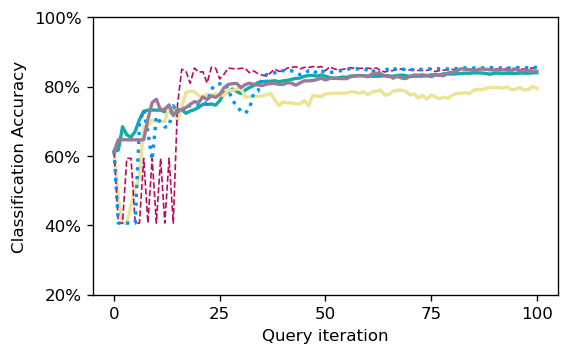

In [272]:
import matplotlib as mpl


mpl.style.use('default')



# Plot our performance over time.
fig, ax = plt.subplots(figsize=(5, 3), dpi=120)

ax.plot(performance_history_lr, color=[0.066, 0.674, 0.647], linewidth=2) #light
ax.plot(performance_history_knn, color=[0.929, 0.890, 0.592], linewidth=2) #yellow
ax.plot(performance_history_rf, color=[0.733, 0.047, 0.388], linewidth=1, linestyle='--') #wine
ax.plot(performance_history_xgb, color=[0, 0.576, 0.980], linewidth=2, linestyle=':') #blue
ax.plot(performance_history_svm, color=[0.6, 0.478, 0.6], linewidth=2) #dark
# ax.scatter(range(len(performance_history_lr)), performance_history, s=5, color='magenta')

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0.2, top=1)
ax.grid(False)

#ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
plt.savefig("AL100-PA.pdf", bbox_inches = 'tight')
plt.show()

---------------------------------------

## Random Forest

0.5720007931083267


From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


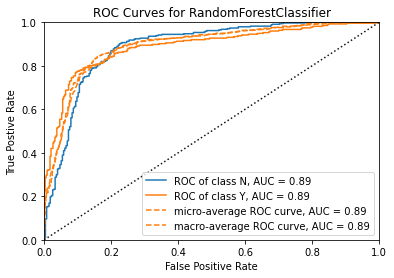

Accuracy: 0.8419354838709677
f-score: 0.8451612903225807
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.90      0.78      0.87      0.84      0.71       344
          1       0.86      0.78      0.90      0.82      0.84      0.69       276

avg / total       0.85      0.85      0.83      0.84      0.84      0.70       620



In [335]:

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

classes=['N', 'Y']


sm = SMOTENC(random_state=50, categorical_features=[1,2,3,4,5,6,7,8])
#X_train, y_train= sm.fit_sample(X_train, y_train)


model = RandomForestClassifier(n_estimators=100, max_depth= 30, max_features=.75, criterion='entropy', min_samples_split=15, class_weight='balanced')  
model.fit(X_train, y_train)  
y_proba = model.predict_proba(X_test)


y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)

threshold = thresholds[ix]
print(threshold)


y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_proba.max(axis=1)
predictions['y_pred']= y_pred

Best Threshold=0.002569,recall=1.000
Best Threshold=0.572001, F-Score=0.816


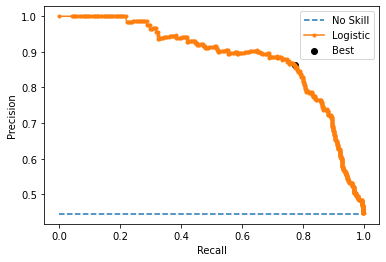

In [336]:

#------------------Only the positive class----------
y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1.01
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)
print('Best Threshold=%f,recall=%.3f' % (thresholds[iy], recall[iy]))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [337]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
auc_score

0.8691327723235156

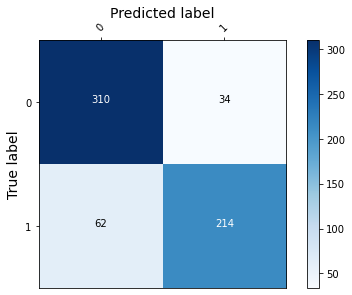

In [338]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()



------------------

## XGBoost

[21:36:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight, pred_margin } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.34869578


From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


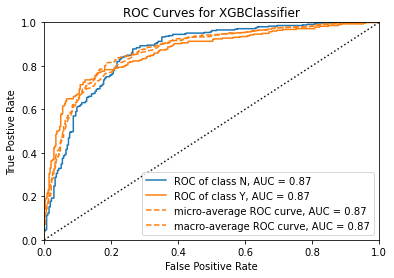

Accuracy: 0.8145161290322581
f-score: 0.8080645161290323
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.84      0.77      0.83      0.80      0.65       344
          1       0.79      0.77      0.84      0.78      0.80      0.64       276

avg / total       0.81      0.81      0.80      0.81      0.80      0.65       620



In [371]:
# from sklearn.model_selection import KFold
# from sklearn import preprocessing
# from sklearn.metrics import f1_score
# from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
import xgboost
import shap

shap.initjs()
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['N', 'Y']




model = XGBClassifier(max_depth=18, gamma=0.03, colsample_bytree=0.71, class_weight='balanced', pred_margin=False) 
model.fit(X_train.values, y_train)  


y_proba = model.predict_proba(X_test.values)


y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)

threshold = thresholds[ix]
print(threshold)
y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train.values, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test.values, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test.values, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_proba.max(axis=1)
predictions['y_pred']= y_pred

In [372]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
auc_score

0.8326746195586513

In [374]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
f=shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.save_html("force-h.html", f)

In [342]:
# f=shap.force_plot(explainer.expected_value, shap_values, X, show=False)
# shap.save_html("index.htm", f)

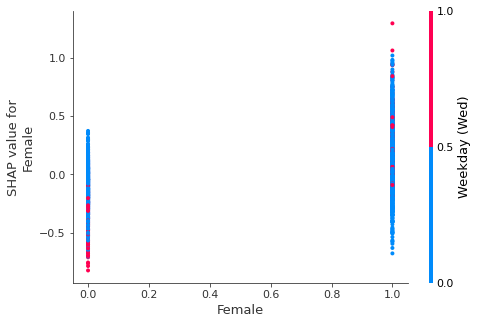

In [343]:
shap.dependence_plot("Female", shap_values, X)

In [344]:
# import matplotlib.pyplot as pl
# mapped_feature_names=list(X.columns.values)
# xgb_shap_interaction = shap.TreeExplainer(model).shap_interaction_values(X)
# shap.dependence_plot(("hour", "weekday_sun"), xgb_shap_interaction, X, feature_names=np.array(mapped_feature_names), show=False)
# pl.savefig("nhanes_age_sex_interaction.pdf", dpi=400)
# pl.show()

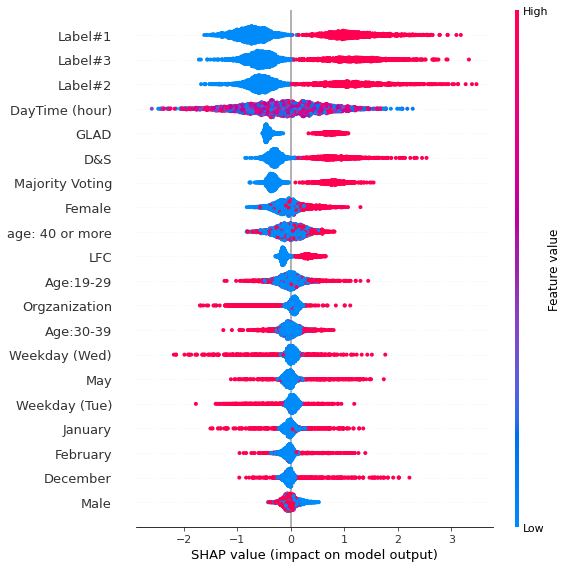

In [345]:
from matplotlib import colors as plt_colors
import numpy as np
import shap
import matplotlib.pyplot as pl




shap.summary_plot(shap_values, X, show=False)

pl.savefig("ranks.pdf", dpi=800,  bbox_inches = 'tight')
pl.show()

In [365]:
explainer.expected_value


-0.60105973

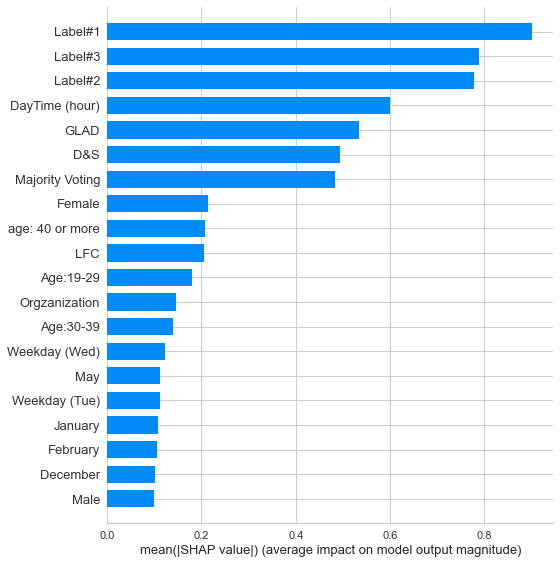

In [62]:
shap.summary_plot(shap_values, X, plot_type="bar", show=False)

pl.savefig("bars.pdf", dpi=800,  bbox_inches = 'tight')
pl.show()

In [63]:
# bg=shap.sample(X_train, 200)
# explainer = shap.KernelExplainer(model.predict_proba, bg, link="logit")
# shap_values = explainer.shap_values(X)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

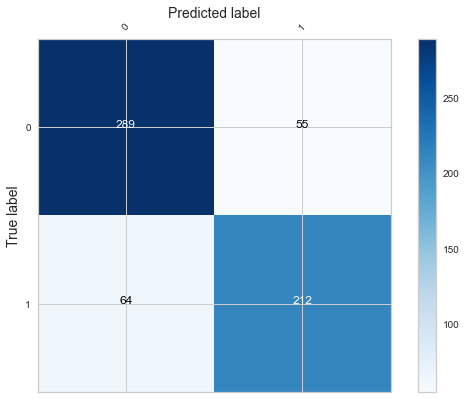

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

[14:56:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Threshold=0.348696, F-Score=0.781


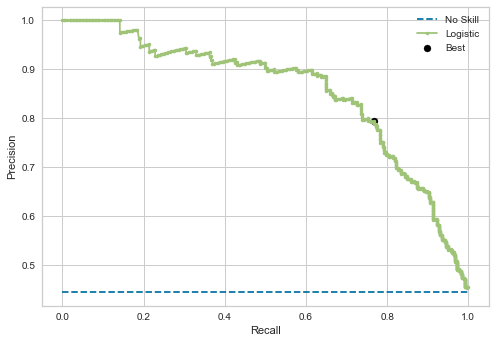

In [66]:
model = XGBClassifier(max_depth=18, gamma=0.03, colsample_bytree=0.71, class_weight='balanced') 
clf=model.fit(X_train, y_train)  
y_pred = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# plot the roc curve for the model
b=1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


In [67]:
from numpy import argmax
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.348696, F-Score=0.781


In [68]:
print(y_test)

928     1
2903    0
689     1
2527    0
551     0
       ..
2830    0
1743    1
2251    1
1296    0
655     0
Name: truth, Length: 620, dtype: category
Categories (2, int64): [0, 1]


In [69]:
type(y_pred)

numpy.ndarray

0.16435575864221907


From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


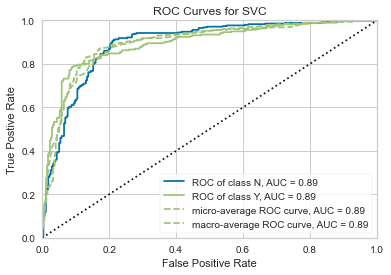

Accuracy: 0.8435483870967742
f-score: 0.8548387096774194
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.91      0.79      0.87      0.85      0.72       344
          1       0.87      0.79      0.91      0.83      0.85      0.71       276

avg / total       0.86      0.85      0.84      0.85      0.85      0.72       620



In [215]:
from sklearn import svm
# from sklearn.model_selection import KFold
# from sklearn import preprocessing
# from sklearn.metrics import f1_score
# from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
import xgboost
import shap

shap.initjs()

# from imblearn.metrics import classification_report_imbalanced
# from sklearn.ensemble import RandomForestClassifier
# classes=['YY','YN','NY','NN', 'NC']


# kf = KFold(n_splits=2)

# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train = X.iloc[train_index]
#     y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
#     X_test = X.iloc[test_index]
#     y_test = y.iloc[test_index]  # See comment on ravel and  y_train

#     model = XGBClassifier(max_depth=8, gamma=0.063, colsample_bytree=0.71)
#     model.fit(X_train, y_train)  
#     y_pred = model.predict(X_test)
#     visualizer = ROCAUC(model, classes=classes)
#     visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#     visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#     visualizer.poof("XGB_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
#     print(f'For fold {fold}:')
#     print(f'Accuracy: {model.score(X_test, y_test)}')
#     f1=f1_score(y_test, y_pred, average='micro')
#     print(f'f-score: {f1}')
#     print(classification_report_imbalanced(y_test, y_pred))
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['N', 'Y']




model = svm.SVC(kernel='linear', C=3, probability=True) 
model.fit(X_train.values, y_train)  


y_proba = model.predict_proba(X_test)


y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)

threshold = thresholds[ix]
print(threshold)
y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_proba.max(axis=1)
predictions['y_pred']= y_pred

In [216]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
auc_score

0.8777017297802712

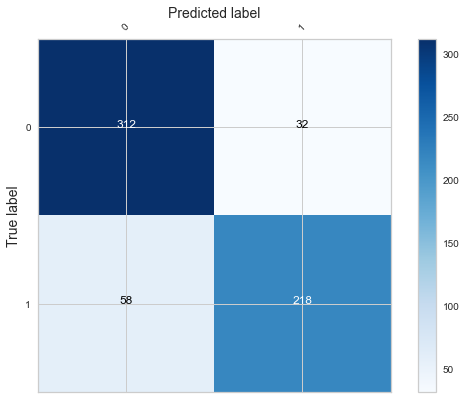

In [122]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()